# Northwestern County: Real Estate Market Analysis  

<img src = "Image.jpg" style = width:1200px;height:650px>

### Project Overview:   
Every Door Real Estate, our stakeholder, is facing a business
issue related to their clients' home-buying process. The objective is to help clients comprehend more about the house attributes and make informed decisions in their home-buying/selling process. The challenge is to determine a model that can effectively
demonstrate how property attributes impact house prices. This model will help Every
Door's agents to provide their clients with a clearer insight into how much pre-approval they need for their ideal property.

### Audience:
Every Door Real Estate. The agency's mission is to provide clients with comprehensive insights to enhance their understanding on the correlation between house attributes and house prices.


### Goal:  
This analysis will be guiding Every Door Real Estate on the impact of various property attributes on
their pricing structure. The anlysis aims to offer a clear understanding of how property attributes collectively influence the estimated value of homes, enabling strategic decisions for optimal return on investment.

## Data Understanding:Dataset
This analysis uses King County House Sales dataset, found in kc_house_data.csv in the data folder in GitHub repository. The dataset is significant in predicting house prices in relation to property attributes.  
The data is imported and uploaded using necessary libraries. Some of the libraries imported for data analysis includes matplotlib, numpy,pandas, seaborn, scipy,and others. The structure of the data is made up of 21597 observations and 21 columns describing the property attributes.

## Column Names and Descriptions for King County Data Set
1. **Id** - Unique identifier for a house  
2. **Date** - Date house was sold  
3.**Price** - Sale price (prediction target)  
4.**Bedrooms** - Number of bedrooms  
5.**Bathrooms** - Number of bathrooms  
6.**Sqft_living** - Square footage of living space in the home  
7. **Sqft_lot** - Square footage of the lot  
8. **Floors** - Number of floors (levels) in house  
9. **Waterfront** - Whether the house is on a waterfront  
Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
10. **View** - Quality of view from house  
Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
11. **Condition** - How good the overall condition of the house is. Related to maintenance of house.  
See the King County Assessor Website for further explanation of each condition code
12. **Grade** - Overall grade of the house. Related to the construction and design of the house.  
See the King County Assessor Website for further explanation of each building grade code
13. **Sqft_above** - Square footage of house apart from basement  
14. **Sqft_basement** - Square footage of the basement  
15. **Yr_built** - Year when house was built  
16. **Yr_renovated** - Year when house was renovated  
17. **Zipcode** - ZIP Code used by the United States Postal Service  
18. **Lat** - Latitude coordinate  
19. **Long** - Longitude coordinate  
20. **Sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors  
21. **Sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

The data suggest that prices of houses depends on the features of the property.
However data cleaning and wrangling is important to make the data more useful. The process of data cleaning and wrangling includes checking for missing values, duplicates, uniformity,and data formats.Additional cleaning including replacing missing values, dropping insignificant data, filling null values, and dropping duplicates using relevant functions and methods is also done to further make the data more valuable.


# Data Loading and Importation of Modules

In [73]:
#Import necessary libraries
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


# Data Cleaning and Wrangling:Data Preparation

The process of data cleaning and wrangling entailed formatting the data to remove duplicates, filled missing values, deleting undesirable symbols, and selecting required property variables for further modelling. From the observations, the data did not have any duplicates.  
However, the variables:  
a.	Waterfront, yr_renovated, and view contained missing values which were filled with appropriate data. The missing values in waterfront were replaced with “NO” to assume the households lacked waterfronts. The missing values in view were replaced with “NONE” to assumed a lack of view. The missing values in yr_renovated were replaced with 0 to mean the houses were never renovated.   
b.	The values in the variable bathroom were standardized to decimal places because it was observed the values lacked uniformity of decimal places.   
c.	The date section was standardized to: day, month, and year format for uniformity.    
d.	The sqft_basement contained undesirable symbols which were removed, replaced with mean, and the data converted to numerical values. The data was also converted to 2 decimal places for uniformity.    
e.	The values in the latitude and longitude variables were converted to 2 decimal places for effective analysis and modelling.    
f.	The whole data set was confirmed clean and ready for modelling using the info() method.    
g.	During wrangling, the columns 'zipcode','id', 'lat', 'long', 'yr_renovated', 'yr_built' were observed to be insignificant and consequently were dropped.     


In [74]:
#observe data structure
df.shape

(21597, 21)

In [75]:
#check for duplicates
df.duplicated().sum()

0

In [76]:
#confirm duplicates
df[df.duplicated(keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [77]:
#Check for nulls
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [78]:
#check data type and unique values in waterfront;
df["waterfront"].unique()

array([nan, 'NO', 'YES'], dtype=object)

In [79]:
#check data type and unique values in waterfront
df["waterfront"].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [80]:
#replace nan with the mode, that is No value
#Assumption is nan means no waterfront
#Check for successful replacements
df['waterfront'].replace(np.nan, "NO", inplace=True, regex=False)

In [81]:
#check for successful replacement
df["waterfront"].unique()

array(['NO', 'YES'], dtype=object)

In [82]:
#check data type and unique values in conditions
df["condition"].unique().tolist()

['Average', 'Very Good', 'Good', 'Poor', 'Fair']

In [83]:
#check data type and unique values in conditions
df["condition"].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [84]:
#check data type and unique values in bathrooms
#output shows inconsistent decimals
df["bathrooms"].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [85]:
#Round to 2 decimals for uniformity
df["bathrooms"]=df["bathrooms"].round(2)
df["bathrooms"]

0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
         ... 
21592    2.50
21593    2.50
21594    0.75
21595    2.50
21596    0.75
Name: bathrooms, Length: 21597, dtype: float64

In [86]:
#Let's assume that missing values in 'yr_renovated'
#mean no renovations were done, so we'll fill the missing values with 0.
# Fill missing values in 'yr_renovated' with 0
df['yr_renovated'].fillna(0, inplace=True)

# Verify the changes
print(df['yr_renovated'].value_counts())

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64


In [87]:
#check data type and unique values in view
df["view"].unique().tolist()

['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR']

In [88]:
#check data type and unique values in conditions
view_counts = df['view'].value_counts()
view_counts

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [89]:
# Replacing the NaN values with mode NONE
# Verifying the Changes
df['view'].replace(np.nan, "NONE", inplace=True, regex=False)
df['view'].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [90]:
# changing my date column for easier readability
df['date'] = pd.to_datetime(df['date'],format='%m/%d/%Y')

In [91]:
#check for unique values in sqft_basement
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [92]:
# replace '?' with NaN in sqft_basement
df['sqft_basement'].replace('?', np.nan, inplace=True)

# convert the column to a numeric data type
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

# fill missing values with the mean value of the column
df['sqft_basement'].fillna(np.mean(df['sqft_basement']), inplace=True)


In [93]:
#check data type and unique values in 'sqft_basement'
df['sqft_basement'].unique()

array([   0.        ,  400.        ,  910.        , 1530.        ,
        291.85172397,  730.        , 1700.        ,  300.        ,
        970.        ,  760.        ,  720.        ,  700.        ,
        820.        ,  780.        ,  790.        ,  330.        ,
       1620.        ,  360.        ,  588.        , 1510.        ,
        410.        ,  990.        ,  600.        ,  560.        ,
        550.        , 1000.        , 1600.        ,  500.        ,
       1040.        ,  880.        , 1010.        ,  240.        ,
        265.        ,  290.        ,  800.        ,  540.        ,
        710.        ,  840.        ,  380.        ,  770.        ,
        480.        ,  570.        , 1490.        ,  620.        ,
       1250.        , 1270.        ,  120.        ,  650.        ,
        180.        , 1130.        ,  450.        , 1640.        ,
       1460.        , 1020.        , 1030.        ,  750.        ,
        640.        , 1070.        ,  490.        , 1310.     

In [94]:
#round values to 2 decimals places for uniformity
df["sqft_basement"]=df["sqft_basement"].round(2)
df["sqft_basement"]

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: float64

In [95]:
#check for unique values in latitude
df['lat'].unique()

array([47.5112, 47.721 , 47.7379, ..., 47.3906, 47.3339, 47.6502])

In [96]:
#round values to 2 decimals places for uniformity
df["lat"]=df["lat"].round(2)
df["lat"]

0        47.51
1        47.72
2        47.74
3        47.52
4        47.62
         ...  
21592    47.70
21593    47.51
21594    47.59
21595    47.53
21596    47.59
Name: lat, Length: 21597, dtype: float64

In [97]:
#check for uniformity in longitude
df['long'].unique()

array([-122.257, -122.319, -122.233, -122.393, -122.045, -122.005,
       -122.327, -122.315, -122.337, -122.031, -122.145, -122.292,
       -122.229, -122.394, -122.375, -121.962, -122.343, -122.21 ,
       -122.306, -122.341, -122.169, -122.166, -122.172, -122.218,
       -122.36 , -122.314, -122.304, -122.11 , -122.07 , -122.357,
       -122.368, -122.157, -122.31 , -122.132, -122.362, -122.282,
       -122.18 , -122.027, -122.347, -122.016, -122.364, -122.175,
       -121.977, -122.371, -122.151, -122.301, -122.451, -122.322,
       -122.189, -122.384, -122.369, -122.281, -122.29 , -122.114,
       -122.122, -122.116, -122.149, -122.339, -122.335, -122.344,
       -122.32 , -122.297, -122.192, -122.215, -122.16 , -122.179,
       -122.287, -122.036, -122.073, -121.987, -122.125, -122.34 ,
       -122.025, -122.008, -122.291, -122.365, -122.199, -122.194,
       -122.387, -122.372, -122.391, -122.351, -122.386, -122.249,
       -122.277, -122.378, -121.958, -121.714, -122.08 , -122.

In [98]:
#round values to 2 decimals places for uniformity
df["long"]=df["long"].round(2)
df["long"]

0       -122.26
1       -122.32
2       -122.23
3       -122.39
4       -122.04
          ...  
21592   -122.35
21593   -122.36
21594   -122.30
21595   -122.07
21596   -122.30
Name: long, Length: 21597, dtype: float64

In [99]:
#check for unique values in zipcode
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [100]:
#drop unneccessary columns, less significant
df.drop(['id','zipcode', 'lat', 'long', 'yr_renovated', 'yr_built'],
        axis=1, inplace=True)

In [101]:
#confirm columns dropped
df.head(4)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1360,5000


In [102]:
#understand structure of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  object        
 8   view           21597 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  object        
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  float64       
 13  sqft_living15  21597 non-null  int64         
 14  sqft_lot15     21597 non-null  int64         
dtypes: datetime64[ns](1

# Data Exploration


In the further exploring the data, the required columns were converted from object to integer data type.This was the case with sqft_basement. A column, total_space, was created to include sqft_living and sqft_lot variables. An additional season column was added to analyse how housing prices across the different seasons. A further analysis was conducted using the describe()method.
The data was then check for correlation visually and statistically to determined relevant columns for use in modelling. When checking for correlation, variables than were greater than .5 were considered more correlated to price (with a correlation of 1.0). These variables were retained for machine learning and modelling through a multiple regression analysis. Additionally, the selected variables were checked for skewness. All the variables were skewed and the data was standardized to normal distribution. The outliers were checked and removed to make the regression model for effective. Lastly, variables with categorical data were converted to dummy variables and the data added to the dataframe.

In [103]:
#check for columns
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [104]:
#check data types
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront               object
view                     object
condition                object
grade                    object
sqft_above                int64
sqft_basement           float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [105]:
#convert to numeric from object data type
df['sqft_basement']=pd.to_numeric(df['sqft_basement'].replace('?', '0')).astype(int)
df['sqft_basement']

0          0
1        400
2          0
3        910
4          0
        ... 
21592      0
21593      0
21594      0
21595      0
21596      0
Name: sqft_basement, Length: 21597, dtype: int32

**Feature Engineering**

In [106]:
#merge 'sqft_living' and 'sqft_lot' columns
df['total_space'] = df['sqft_living'] + df['sqft_lot']
df['total_space']

0         6830
1         9812
2        10770
3         6960
4         9760
         ...  
21592     2661
21593     8123
21594     2370
21595     3988
21596     2096
Name: total_space, Length: 21597, dtype: int64

In [107]:
#Create column season to check house prices in different seasons
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

In [108]:
# Create a new 'season' column by applying the function to the 'date' column
df['season'] = df['date'].dt.month.apply(get_season)

In [109]:
#check dataframe
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,total_space,season
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0,1340,5650,6830,Fall
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400,1690,7639,9812,Winter
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0,2720,8062,10770,Winter
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910,1360,5000,6960,Winter
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0,1800,7503,9760,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0,1530,1509,2661,Spring
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0,1830,7200,8123,Winter
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0,1020,2007,2370,Summer
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NO,NONE,Average,8 Good,1600,0,1410,1287,3988,Winter


# Data Analysis

In [110]:
# Check data summary
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15,total_space
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,291.833820,1986.620318,12758.283512,1.717973e+04
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,437.822457,685.230472,27274.441950,4.158172e+04
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,399.000000,651.000000,1.423000e+03
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,0.000000,1490.000000,5100.000000,7.036000e+03
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,1840.000000,7620.000000,9.575000e+03
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,550.000000,2360.000000,10083.000000,1.299500e+04
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,6210.000000,871200.000000,1.652659e+06


In [111]:
#check for correlations
df.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
sqft_basement    0.322193
bedrooms         0.308787
floors           0.256804
total_space      0.105009
sqft_lot         0.089876
sqft_lot15       0.082845
Name: price, dtype: float64

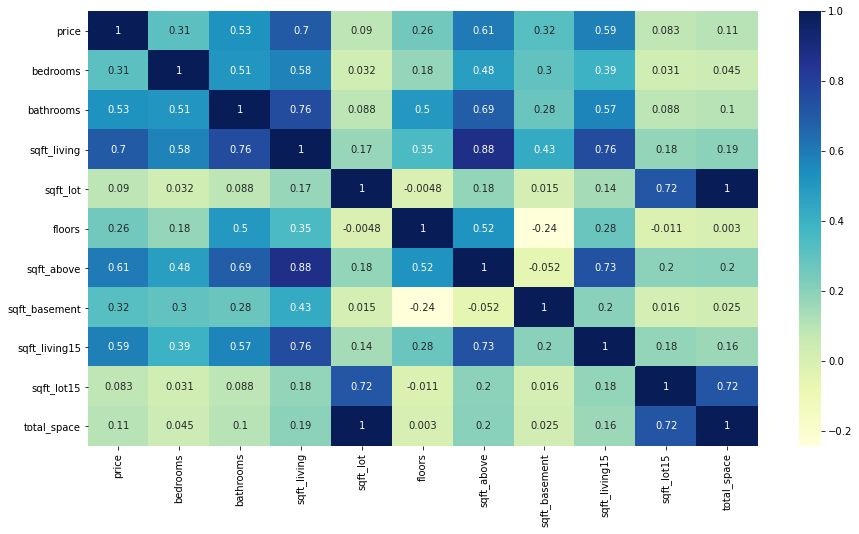

In [112]:
#Visualize correlations
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu");

In [113]:
#drop less correlated variables
df.drop(['bedrooms','sqft_lot', 'floors', 'sqft_basement', 'sqft_lot15', 'total_space'],
        axis=1, inplace=True)

In [114]:
#confirm changes in the dataframe
df.head(2)

,date,price,bathrooms,sqft_living,waterfront,view,condition,grade,sqft_above,sqft_living15,season
0,2014-10-13,221900.0,1.00,1180,NO,NONE,Average,7 Average,1180,1340,Fall
1,2014-12-09,538000.0,2.25,2570,NO,NONE,Average,7 Average,2170,1690,Winter


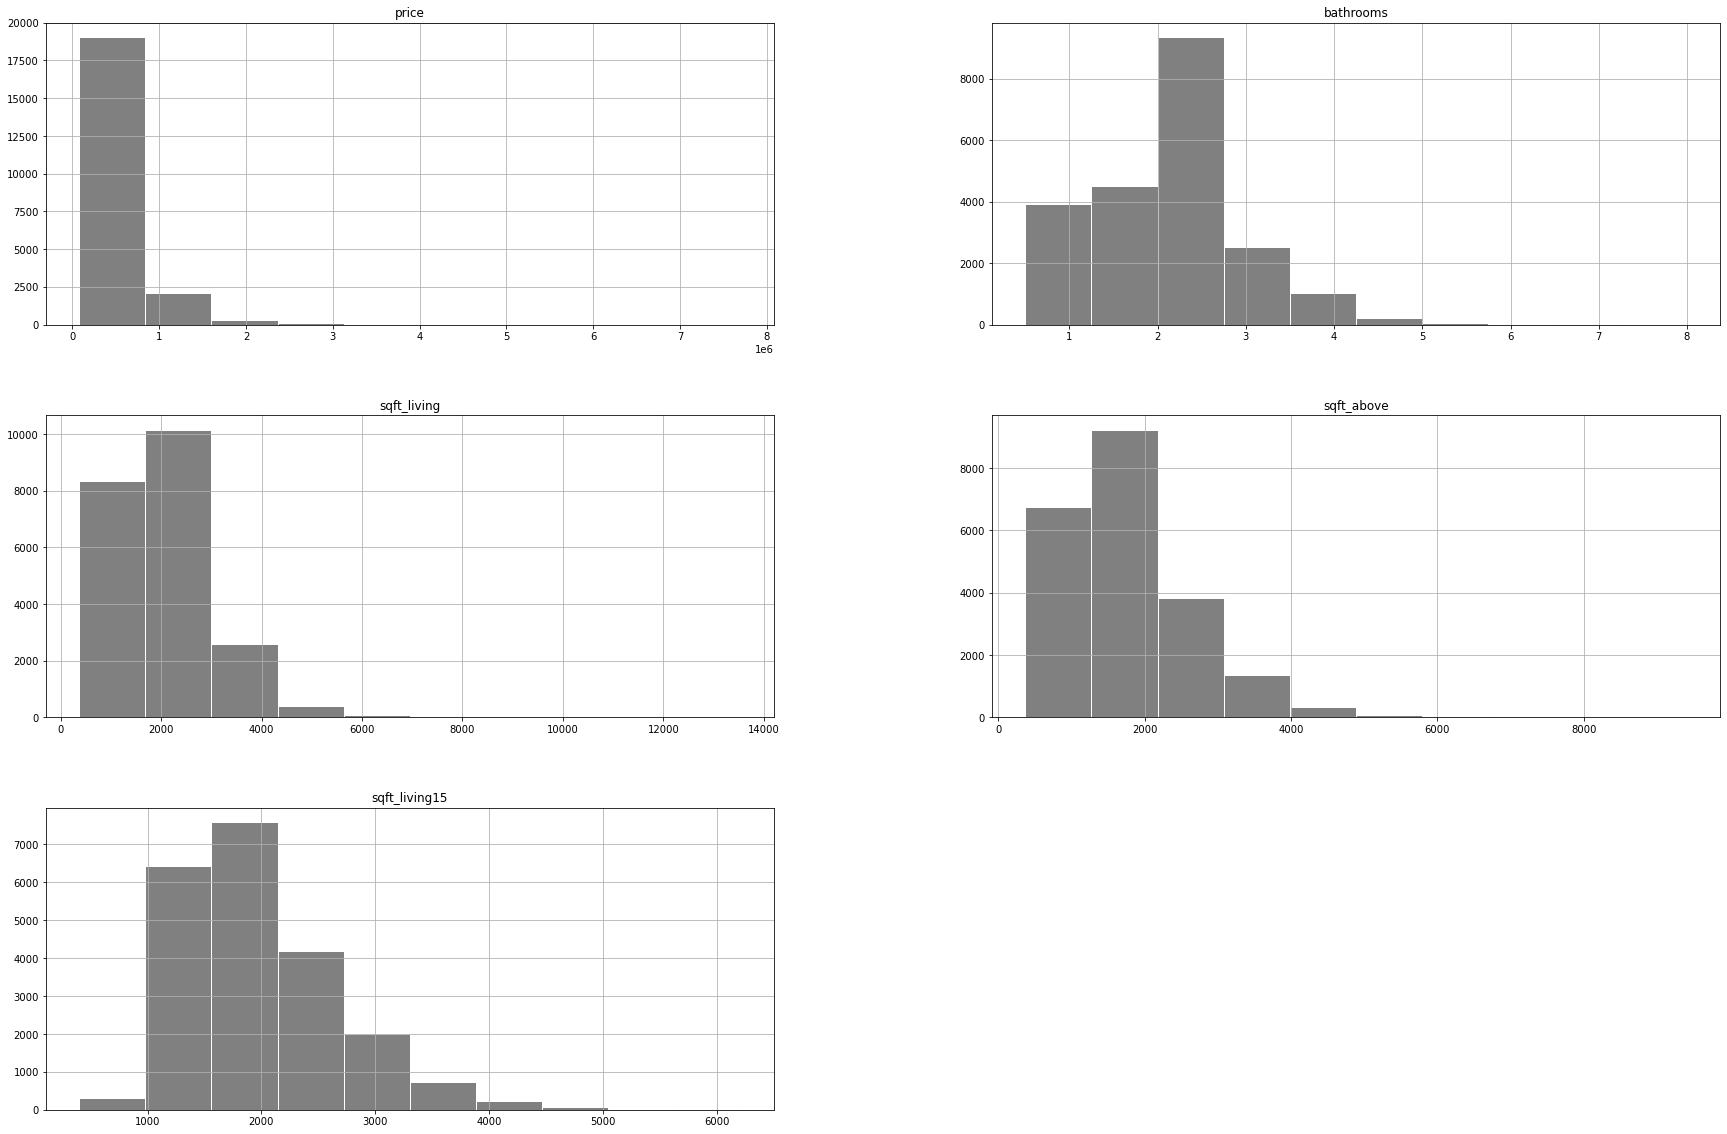

In [115]:
from sklearn.model_selection import train_test_split
#check for basic correlations in the data
df.hist(figsize=(30,20), color='grey', edgecolor='white');

### Deep Processing
Checking and Removing Skewness

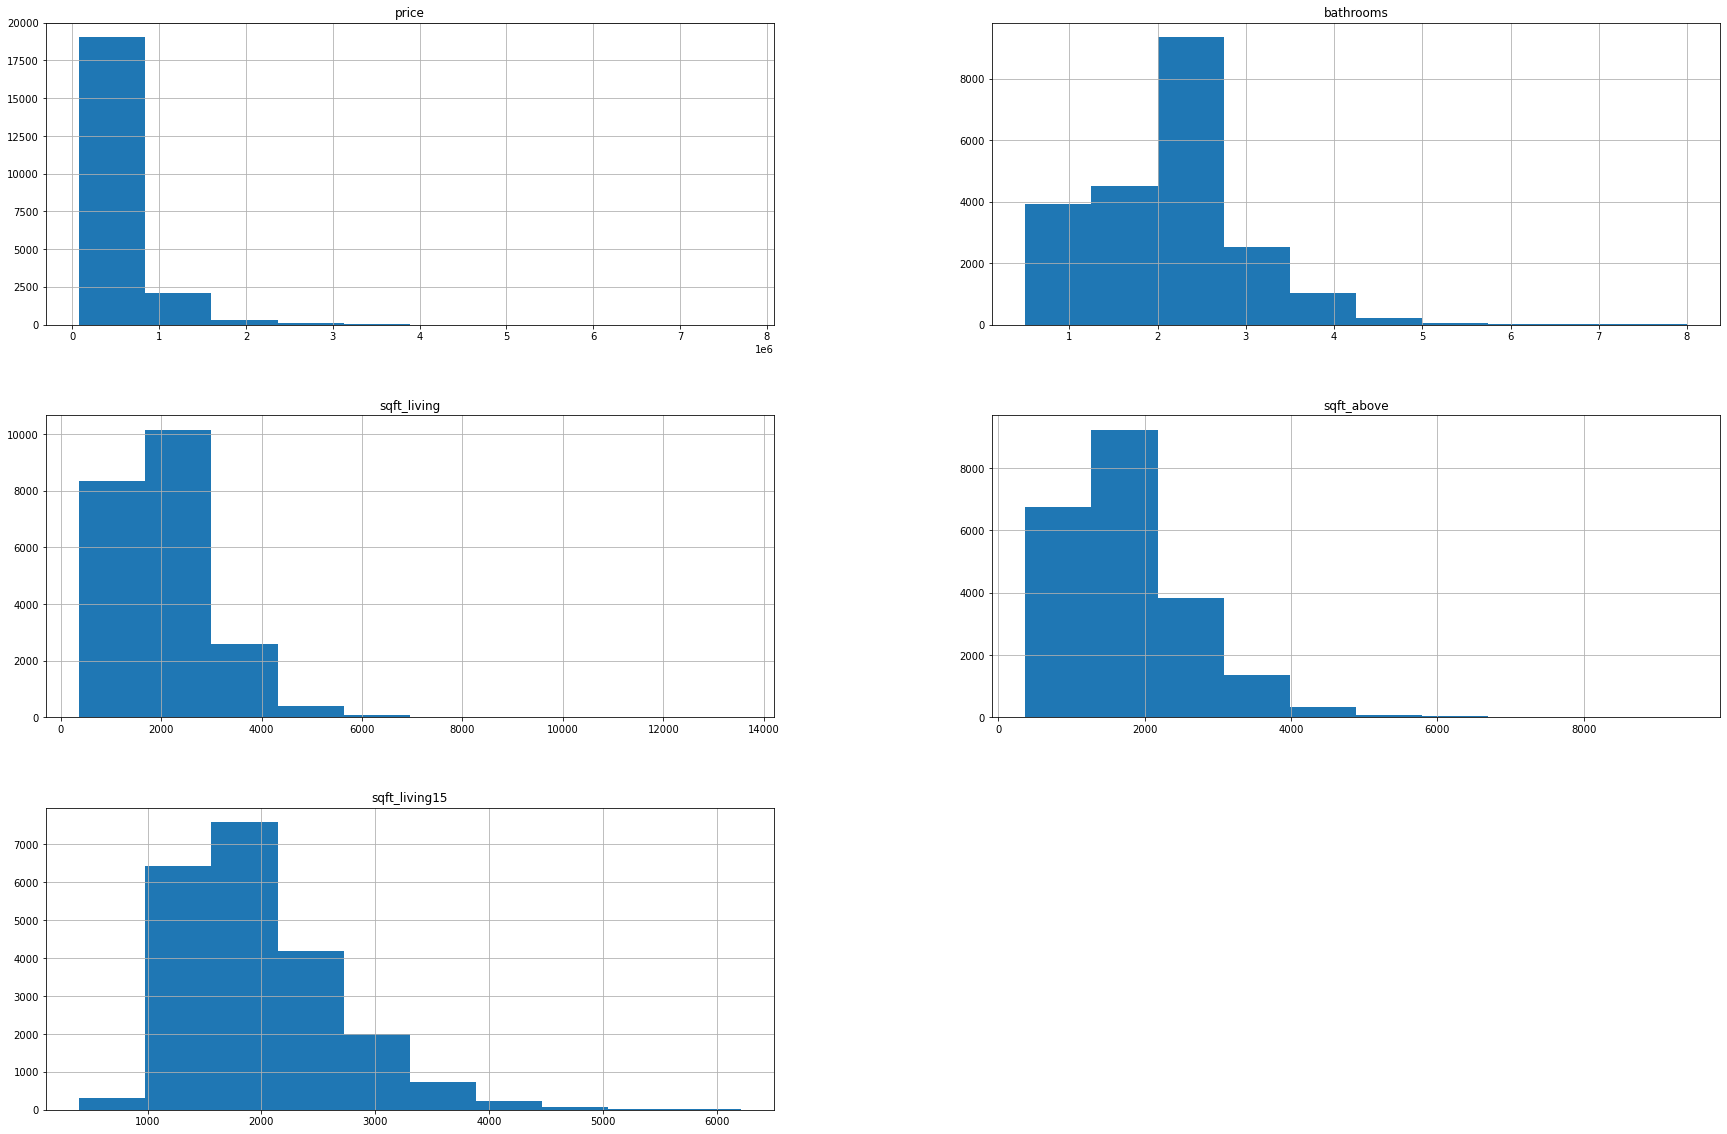

In [116]:
#Visualize skewness using a histogram
df.hist(figsize=(30,20));

In [117]:
#standardize data to normal distribution
df['price']=np.log(df['price']+1)
df['bathrooms']=np.log(df['bathrooms']+1)
df['sqft_living']=np.log(df['sqft_living']+1)
df['sqft_above']=np.log(df['sqft_above']+1)
df['sqft_living15']=np.log(df['sqft_living15']+1)


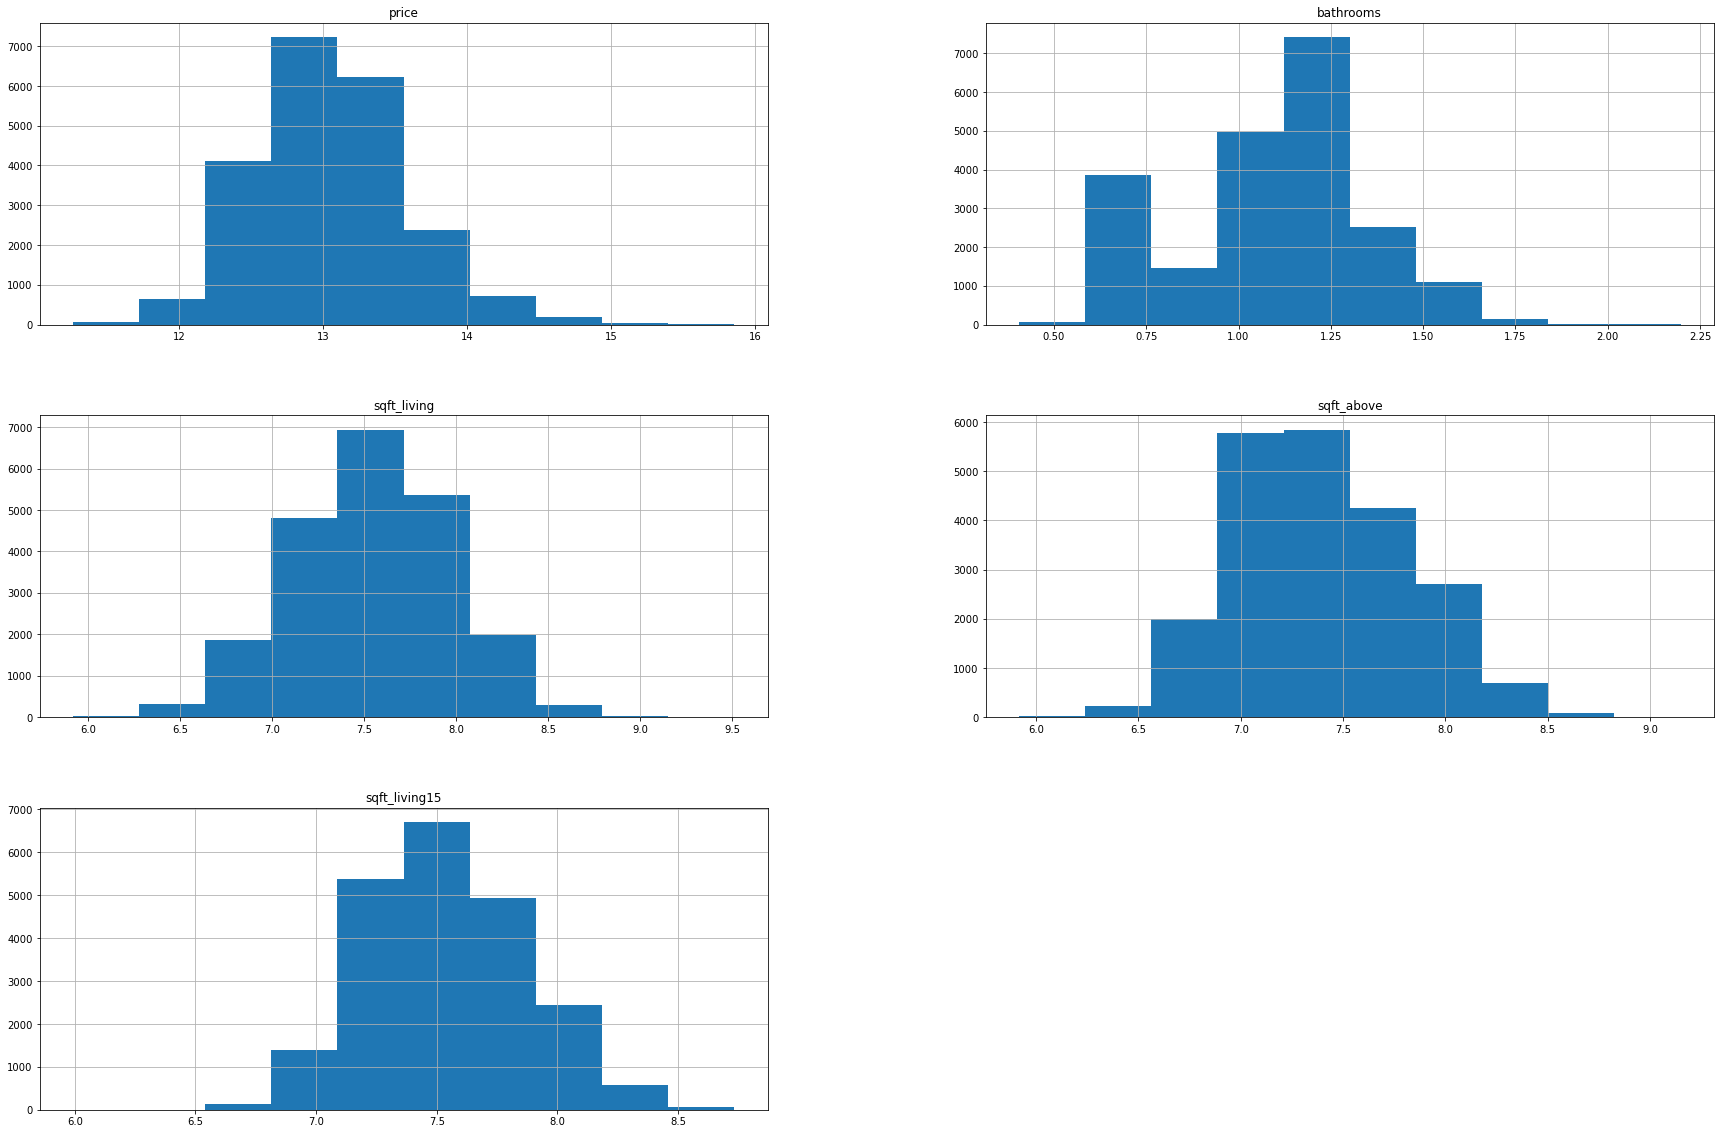

In [118]:
#confirm successful data standardization
df.hist(figsize=(30,20));

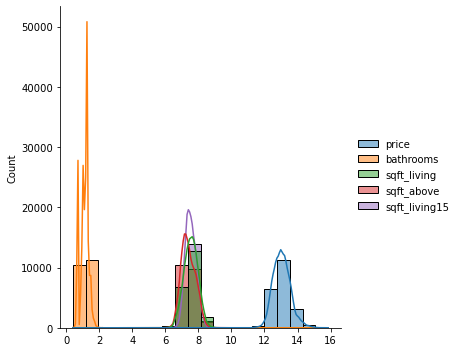

In [119]:
#Check for distribution using displot
sns.displot(df,bins=20,kde=True);

In [120]:
#Bathroom variable shows abnormal distribution
#Remove for outliers in the bathroom column
import numpy as np
count = 0
bathroom_outliers = []
mean = np.mean(df['bathrooms'])
max_distance = np.std(df['bathrooms']) * 3

for idx, row in df['bathrooms'].T.items():
    if abs(row-mean) >= max_distance:
        count += 1
        df.drop(idx, inplace=True)
count

30

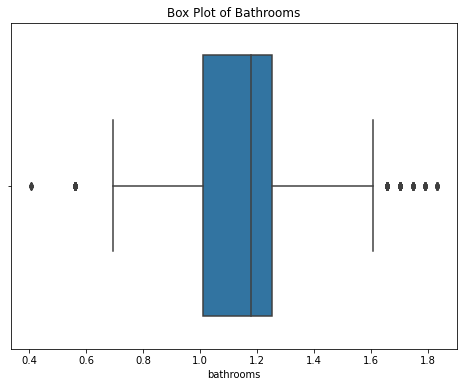

In [121]:
# Assuming df is your DataFrame with cleaned data
#Confirm outliers in boxplot
min_values, max_values = df.bathrooms.quantile([0.010, 0.95])
min_values, max_values
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['bathrooms'])
plt.title('Box Plot of Bathrooms')
plt.show()

In [122]:
# creating summary statistics of pricing of each season
# Group by 'season' and calculate summary statistics
df.groupby('season')['price'].agg(["count","mean"])

,count,mean
season,,
Fall,5049,13.027457
Spring,6510,13.070408
Summer,6317,13.059062
Winter,3691,13.006037


From the summary, we have more average sales during spring evidently seen in value counts and mean.

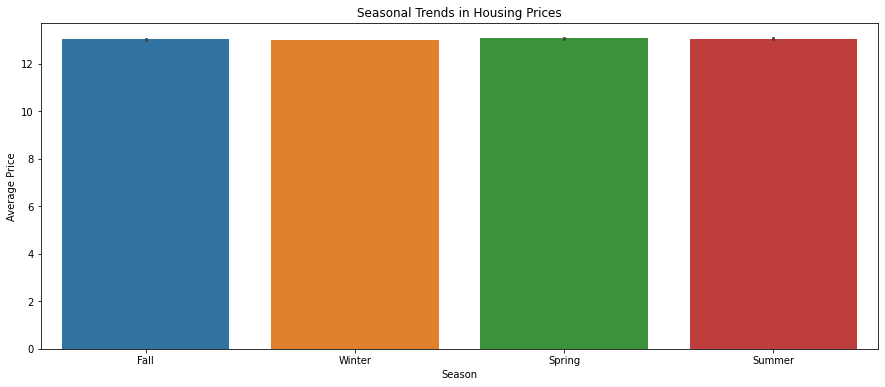

In [123]:
#Visualization: relationship between price and seasons
# Plotting seasonal trends using a bar chart
plt.figure(figsize=(15, 6))
sns.barplot(x='season', y='price', data=df)
plt.title('Seasonal Trends in Housing Prices')
plt.xlabel('Season')
plt.ylabel('Average Price')
plt.show()

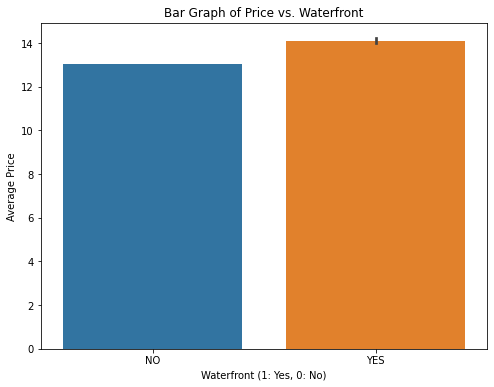

In [124]:
plt.figure(figsize=(8, 6))
sns.barplot(x='waterfront', y='price', data=df)
plt.title('Bar Graph of Price vs. Waterfront')
plt.xlabel('Waterfront (1: Yes, 0: No)')
plt.ylabel('Average Price')
plt.show()


We see that properties on a waterfront typically have higher sale prices than properties that are inland

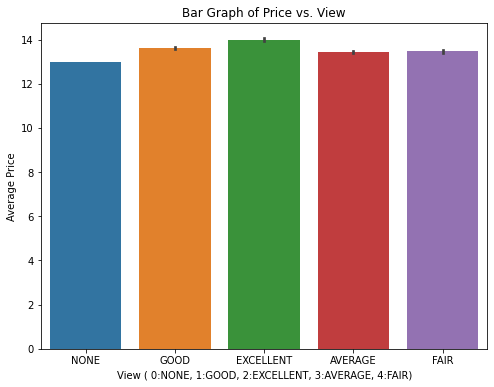

In [125]:
plt.figure(figsize=(8, 6))
sns.barplot(x='view', y='price', data=df)
plt.title('Bar Graph of Price vs. View')
plt.xlabel('View ( 0:NONE, 1:GOOD, 2:EXCELLENT, 3:AVERAGE, 4:FAIR)')
plt.ylabel('Average Price')
plt.show()

We see that properties with an excellent view typically have higher sale prices

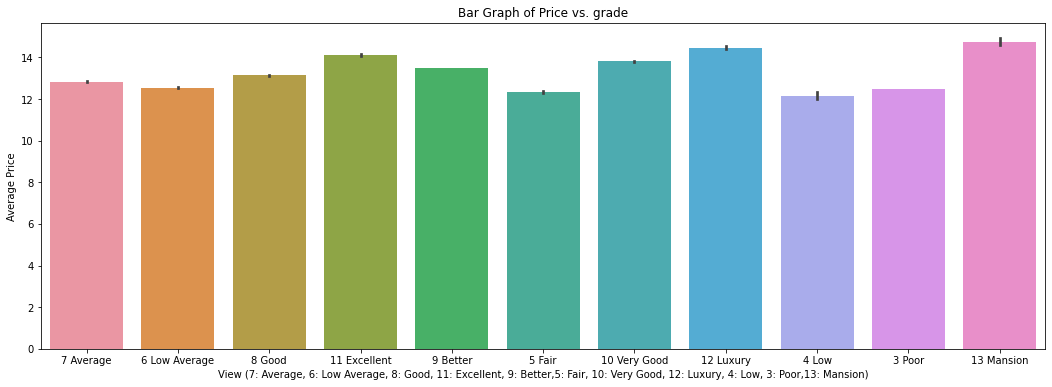

In [126]:
plt.figure(figsize=(18, 6))
sns.barplot(x='grade', y='price', data=df)
plt.title('Bar Graph of Price vs. grade')
plt.xlabel('View (7: Average, 6: Low Average, 8: Good, 11: Excellent, 9: Better,5: Fair, 10: Very Good, 12: Luxury, 4: Low, 3: Poor,13: Mansion)')
plt.ylabel('Average Price')
plt.show()

We see that properties graded mansion, luxury,excellent, and very good typically have higher sale prices

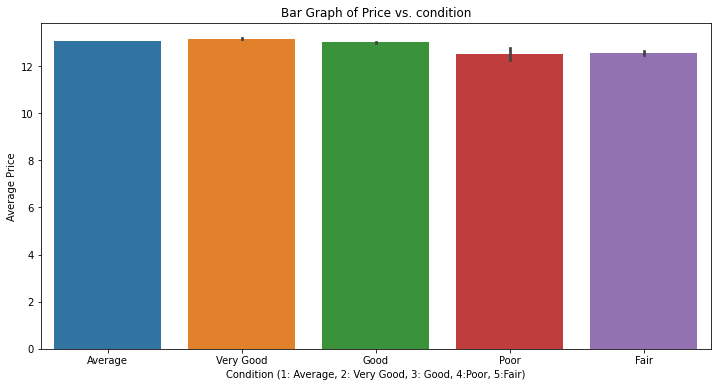

In [127]:
plt.figure(figsize=(12, 6))
sns.barplot(x='condition', y='price', data=df)
plt.title('Bar Graph of Price vs. condition')
plt.xlabel('Condition (1: Average, 2: Very Good, 3: Good, 4:Poor, 5:Fair)')
plt.ylabel('Average Price')
plt.show()

We see that properties with very good condition typically have higher sale prices than properties that are average, good, poor, and fair condition

### Analysing and Combined Modelling

#  Regression Models  
Here we begin to examine potential relationships between different combinations of variables. We are looking to see if we can build a model that shows strong relationships between our variables of interest.

Now that the categorical variables are removed, let us check for correlation of independent vs dependent variables.    
In this case, our dependent variable being "price"  


In [128]:
#Correlations
df.corr()["price"]

price            1.000000
bathrooms        0.526878
sqft_living      0.670892
sqft_above       0.581305
sqft_living15    0.605553
Name: price, dtype: float64

Correlation is a measure of causal relationship rather than causation  
In this summary above, the variables show low-to-medium-to-strong correlations with price  
The property value with a highest correlation with price is the sqft_living followed by sqft_living15.


**Modelling for a simple Linear Regression**  
Regression models are evaluated against a "baseline".  
For simple linear regression, this baseline is an "intercept-only" model that just predicts the mean of the dependent variable every time.  
For multiple linear regression, build a simple linear regression to be that baseline.    


In this case, the simple linear regression will be based price vs sqft_living.  
sqft_living showed the highest and strongest correlation hence fit to create a baseline model for the multiple linear regression

In other words, set up the formula

𝑦̂ =𝛽0^+𝛽1^𝑥

Where  𝑦̂
  is price, the dependent (endogenous) variable, and  𝑥
  is sqft_living, the independent (exogenous) variable. When we fit our model, we are looking for  𝛽1^
  (the slope) and  𝛽0^
  (the intercept).

**Baseline_model**

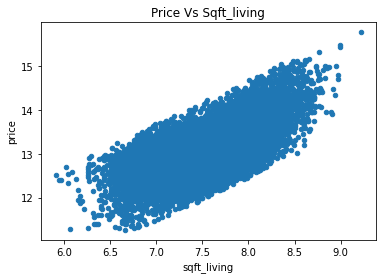

In [129]:
#model 1
#Price vs Sqft_living
X="sqft_living"
y="price"
#plot a scatter plot to show sqft_living vs price
df.plot(x="sqft_living", y="price", kind="scatter", title="Price Vs Sqft_living");

In [130]:
#fit the baseline_model since the scatter shows correlation
X=df["sqft_living"]
y=df["price"]
baseline_model = sm.OLS(endog=y, exog=sm.add_constant(X))
baseline_model

In [131]:
baseline_modelresults = baseline_model.fit()
baseline_modelresults

In [132]:
#Inferential analysis using summary for baseline_modelresults
baseline_modelresults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 1.765e+04
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:34:24   Log-Likelihood:                -10170.
No. Observations:               21567   AIC:                         2.034e+04
Df Residuals:                   21565   BIC:                         2.036e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7597      0.047    142.640      0.000       6.667       6.853
sqft_living     0.8327      0.006    132.857      0.000       0.820       0.845
==============================================================================
Omnibus:                      122.212   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.977
Skew:                           0.136   Prob(JB):                     7.97e-25
Kurtosis:                       2.777   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


### Simple Linear Regression Results and Interpretation

Looking at the summary above,   

a. Constant/y-intercept/C=6.7597  
b. slope/m/x-intercept=0.8327  
c. therefore, regression line is given by:  

$$ \hat{price} = 6.7597 + 0.8327  sqft\_living $$

* The model is statistically significant overall, with an F-statistic p-value well below 0.05
* The model explains (R-squared value= 0.493) 50% of the variance in Price explained by sqft_living
* The model coefficients (`const` and `sqft_Living`) are both statistically significant, with t-statistic p-values well below 0.05
* If a house had sqft_living of 0 sqft, we would expect the price to be about 6.7597K (thousands of dollars)
* For each additional 1sqft living of a property, we see an associated increase in price of about 0.8327K (thousands of dollars)

Note that all of these coefficients represent associations rather than causation.

# Simple Linear Regression Visualization¶
We'll also plot the actual vs. predicted values:

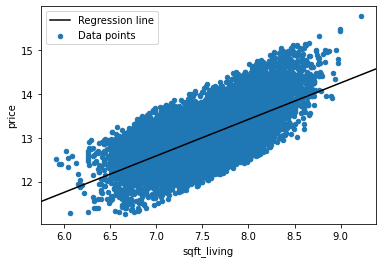

In [133]:
#Show the model
#For Regression line
fig, ax = plt.subplots()
df.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_modelresults,
                        label="Regression line",
                        color="black",
                        ax=ax)
ax.legend();


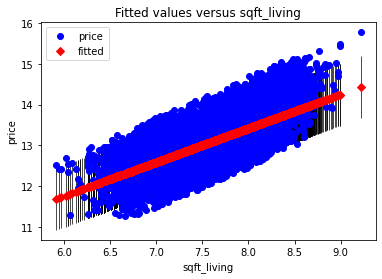

In [134]:
sm.graphics.plot_fit(baseline_modelresults, "sqft_living")
plt.show()

In [135]:

#Calculate residues
baseline_modelresults.resid

0       -0.340199
1       -0.102339
2       -0.194390
3        0.238900
4        0.198024
           ...   
21592   -0.072453
21593   -0.309956
21594    0.375496
21595   -0.004320
21596    0.162619
Length: 21567, dtype: float64

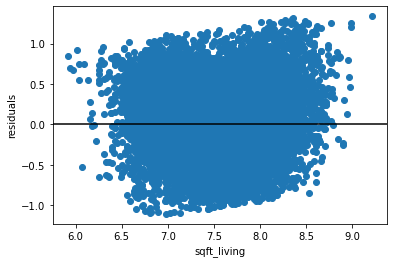

In [136]:
#Visualize residues
fig, ax = plt.subplots()

ax.scatter(df["sqft_living"], baseline_modelresults.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");



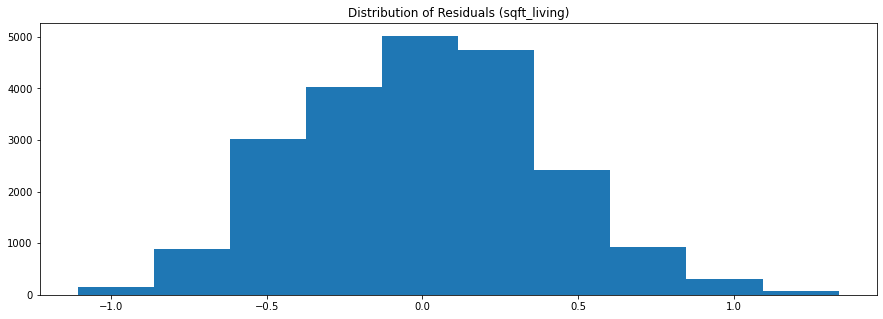

In [137]:
#show residue using histogram
fig, ax = plt.subplots(figsize=(15,5))
ax.hist(baseline_modelresults.resid)
ax.set_ylabel=("Price")
ax.set_xlabel=("sqft_living")
ax.set_title("Distribution of Residuals (sqft_living)");

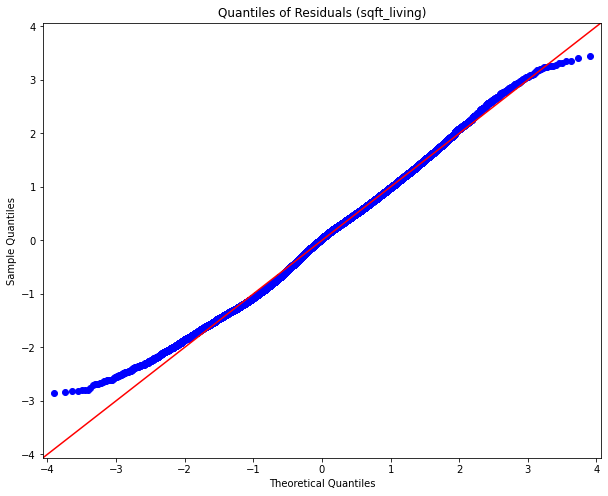

In [138]:
#Residue plot using qq-plot
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(10,8))
sm.graphics.qqplot(baseline_modelresults.resid, dist=norm, line="45", fit=True, ax=ax)
ax.set_title("Quantiles of Residuals (sqft_living)")
plt.show()


**Model evaluation**

In [139]:
mae = baseline_modelresults.resid.abs().sum() / len(y)
mae

0.3141413132521112


model is off by 0.31K in any given prediction

# SECOND MODEL:..with additional independent variables

The second model employs variables with strong causal relationship with price in reference to the correlation summary. The variables added in the second model include bathrooms, sqft_above, and sqft_living15.

In [140]:
X_secondvariable=df[["sqft_living","bathrooms","sqft_above","sqft_living15"]]
X_secondvariable.head(3)

,sqft_living,bathrooms,sqft_above,sqft_living15
0,7.074117,0.693147,7.074117,7.201171
1,7.852050,1.178655,7.682943,7.433075
2,6.647688,0.693147,6.647688,7.908755


In [141]:
#for second model and Summary
second_model = sm.OLS(y, sm.add_constant(X_secondvariable))
second_modelresults = second_model.fit()

print(second_modelresults.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     4903.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:34:28   Log-Likelihood:                -9644.0
No. Observations:               21567   AIC:                         1.930e+04
Df Residuals:                   21562   BIC:                         1.934e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.7587      0.070     81.685

# Second Model:Results and Interpretations


Model Regression equation:

$$ \hat{Price} = 5.7587 + 0.6355 sqft\_living+ 0.0799 bathrooms - 0.0764 sqft\_above + 0.3935 sqft\_living15 $$

The coeffecient has decreased from 6.7597 in the first model to 5.7587 in the second model. This is because of the intercept is now with respect to bathrooms, sqft_living15, and sqft_above  
* The model is statistically significant overall, with an F-statistic p-value well below 0.05
* The model explains about 43% of the variance in price
* The model coefficients (`const`, `bathrooms`, `sqft_above`and `sqft_living15`) are all statistically significant, with t-statistic p-values well below 0.05
* If a house had sqft_above of 0 sqft, or sqft_living15 of 0, or no bathroom, we would expect the price to be about 5.7587K (thousands of dollars)
* For each additional 1sqft_living15, we see an associated increase in price of about 0.3935K
* For each additional 1sqft_above, we see an associated decrease in price of about 0.0764K
* For each additional 1bathroom, we see an associated increase in price of about 0.0799 (thousands of dollars)
* For each additional 1sqft_living, we see an associated increase in price of about 0.6355 (thousands of dollars)  
    **This is a little bit smaller of a decrease than we saw with the simple model, but not a big change. This means that second model was not meaningfully confounding in the relationship between price and sqft_living**  
Note that all of these coefficients represent associations rather than causation.
* For each increase of 1 lb in car weight, we see an associated decrease in MPG of about .007
  * This is a little bit smaller of a decrease than we saw with the simple model, but not a big change. This means that model year was not meaningfully confounding in the relationship between weight and MPG


# Visualization for the second model

a. **Model fit**

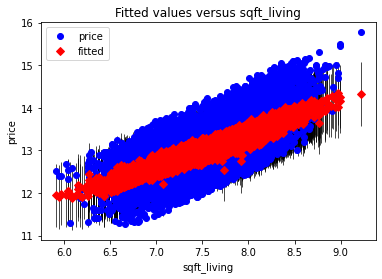

In [142]:
sm.graphics.plot_fit(second_modelresults, "sqft_living")
plt.show()

This shows the true (blue) vs. predicted (red) values, with the particular predictor (in this case, sqft_living) along the x-axis. Note that unlike with a simple regression, the red dots don't appear in a perfectly straight line. This is because their predictions are made based on the entire model, not just this predictor.


b.**Fit Model for Bathrooms, Sqft_above, and Sqft_living15**

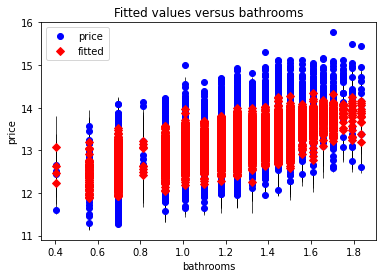

In [143]:
#Bathroom
sm.graphics.plot_fit(second_modelresults, "bathrooms")
plt.show()

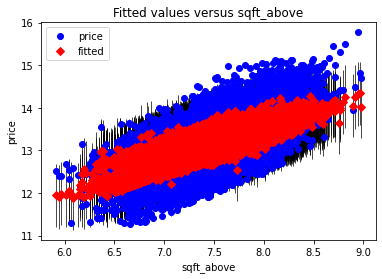

In [144]:
#For Sqft_above
sm.graphics.plot_fit(second_modelresults, "sqft_above")
plt.show()

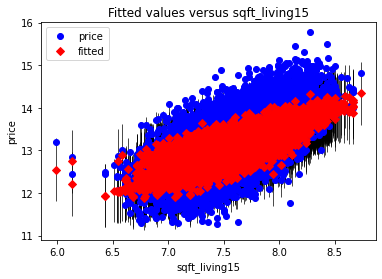

In [145]:
#For sqft_living15
sm.graphics.plot_fit(second_modelresults, "sqft_living15")
plt.show()

C. **Partial Regression Plot**  
Then, instead of a basic scatter plot with a best-fit line (since our model is now higher-dimensional), we'll use two partial regression plots, one for each of our predictors.

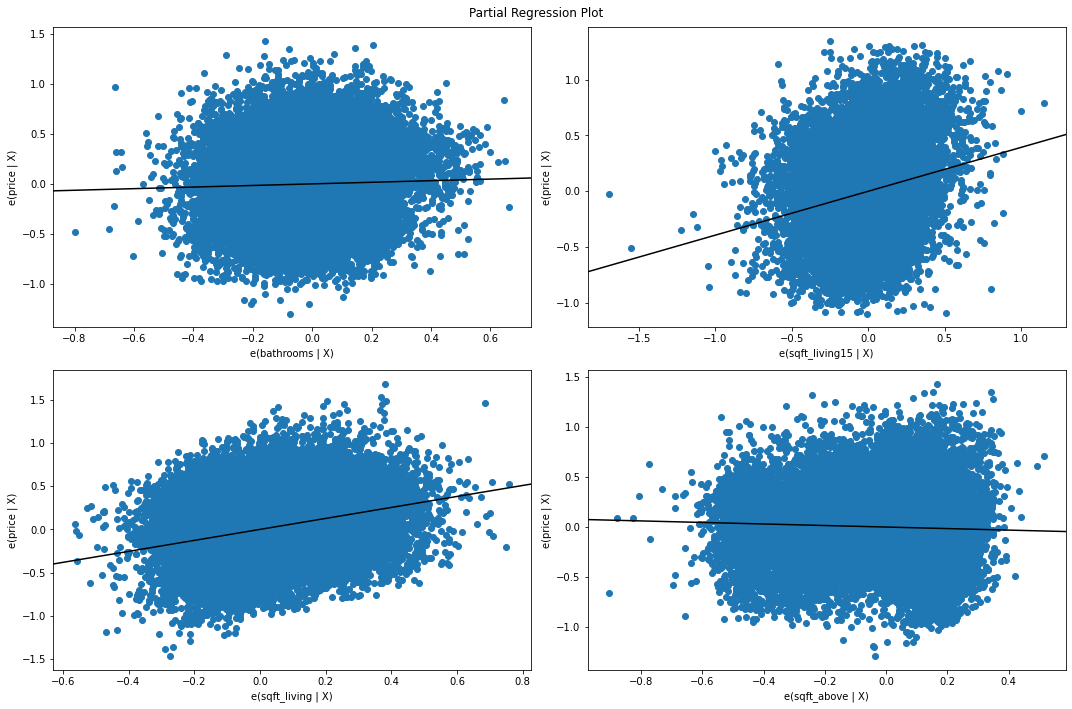

In [146]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_partregress_grid(second_modelresults,
                                  exog_idx=["bathrooms", "sqft_living15","sqft_living", "sqft_above"],
                                  fig=fig)
plt.tight_layout()
plt.show()

Plot shows a linear relationship with a non-zero slope, it is therefore beneficial to add sqft_living to the model, vs. having a model without sqft_living (i.e. a model with just an intercept and the other variables).

It can be deduced that these predictors are useful and should be included in the model. However, bathroom and sqft_living can be ignored since their slopes are nearly zeros slopes

d.**Residual Plots combination other plots**

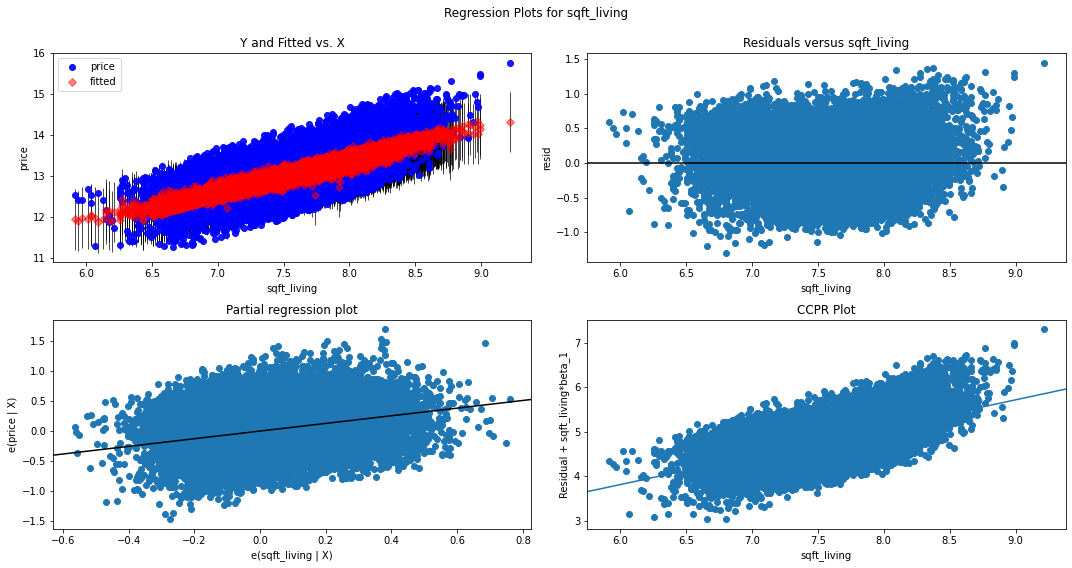

In [147]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(second_modelresults, "sqft_living", fig=fig)
plt.show()

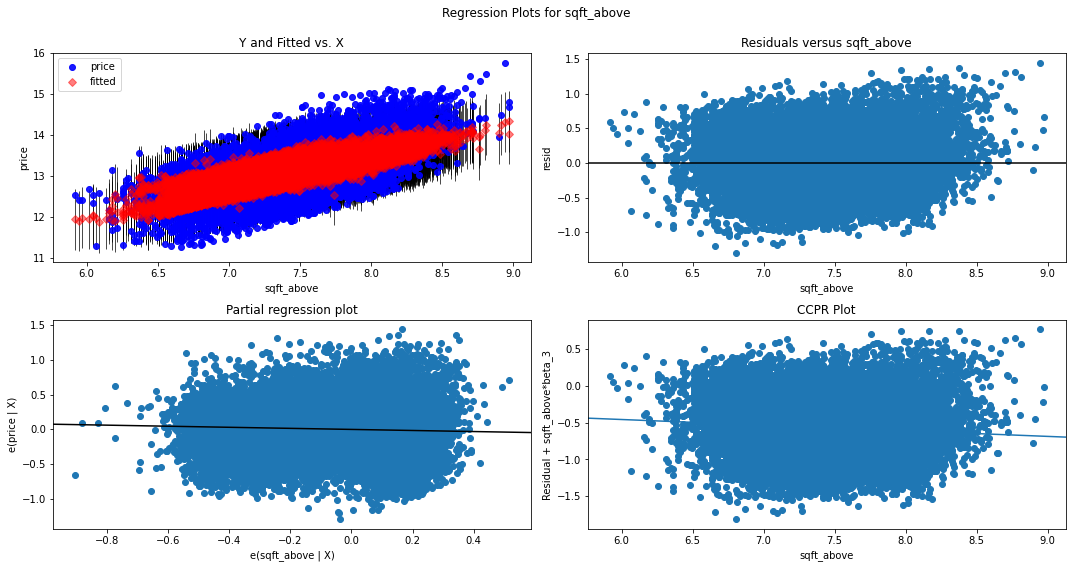

In [148]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(second_modelresults, "sqft_above", fig=fig)
plt.show()

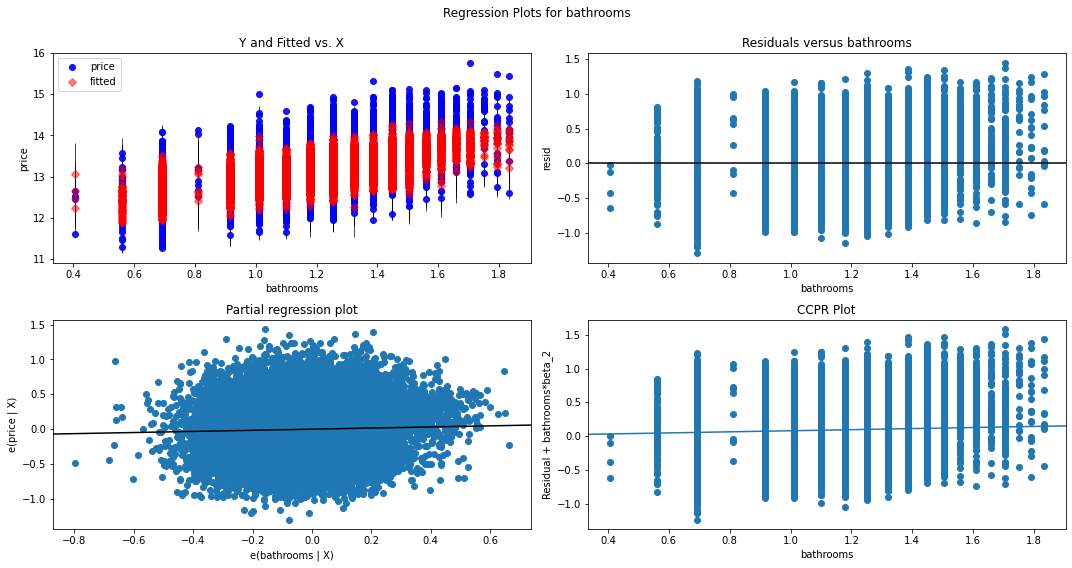

In [149]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(second_modelresults, "bathrooms", fig=fig)
plt.show()

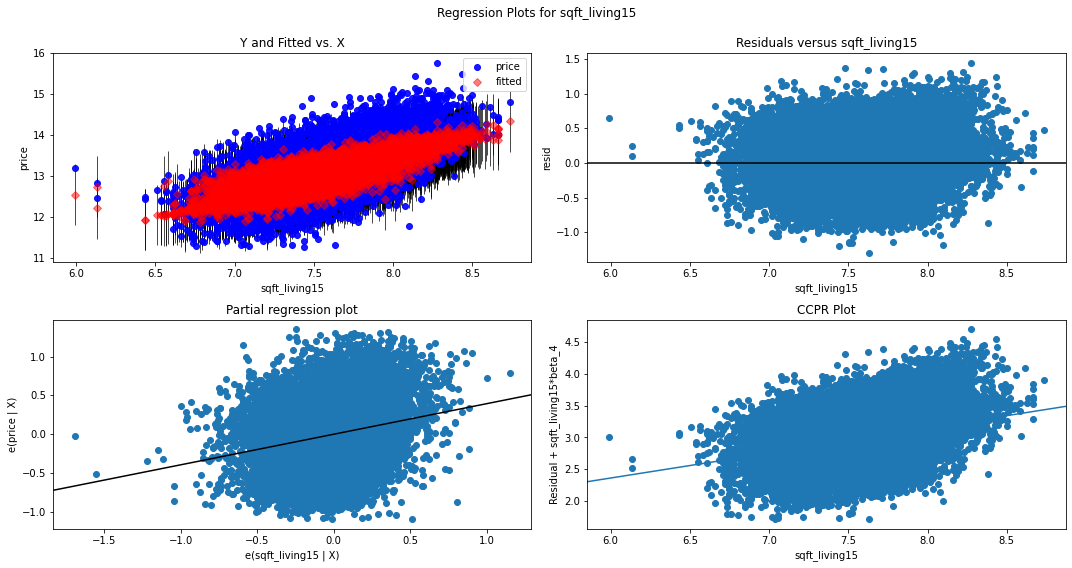

In [150]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(second_modelresults, "sqft_living15", fig=fig)
plt.show()

**Model Evalution**

In [151]:
mae = second_modelresults.resid.abs().sum() / len(y)
mae

0.30679960705293896

Model is off by 0.306k price for a given prediction

# Third Model: Multiple Regression with Many Features

In [152]:
# dropping price because this is our target,
#then only selecting numeric features
X_all = df.drop(["price"], axis=1).select_dtypes("number")
X_all.head(5)

,bathrooms,sqft_living,sqft_above,sqft_living15
0,0.693147,7.074117,7.074117,7.201171
1,1.178655,7.852050,7.682943,7.433075
2,0.693147,6.647688,6.647688,7.908755
3,1.386294,7.581210,6.957497,7.215975
4,1.098612,7.427144,7.427144,7.496097


In [153]:
third_model = sm.OLS(y, sm.add_constant(X_all))
third_results = third_model.fit()

print(third_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     4903.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:34:49   Log-Likelihood:                -9644.0
No. Observations:               21567   AIC:                         1.930e+04
Df Residuals:                   21562   BIC:                         1.934e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.7587      0.070     81.685

# Third model results and Interpretations

The model is:  

price = 9.9275 − 0.0510bedrooms - 0.0022bathrooms + 0.0771sqft\_living - 0.0003sqft\_lot + 0.1141floors - 0.1283sqft\_above + 0.00007104sqft\_basement + 0.3745sqft\_living15-0.000001045sqft\_lot15 + 0.003total\_space  
 *The model is statistically significant overall, with an F-statistic p-value well below 0.05  
 *The model explains about 51.8% of the variance in price  
 *Using multiple predictors increased the value of R-Squared by 15.11%, this makes this model fit and suitable for use  
 *Only some of the model coefficients are statistically significant while others statistically insignificant  
 *Bedrooms, sqft\_lot, floors, sqft\_above, sqft\_basement, sqft\_living15, sqft\_lot15, and total\_space p-values below 0.05 and are therefore statistically significant  
 *Bathrooms and sqft\_living have p-values above 0.05. This means that there is greater than a 1 in 20 chance that their true coefficients are 0 (i.e. they have no effect on price), and are thus not statistically significant at an alpha of 0.05  


**Visualization using Partial regression plots**

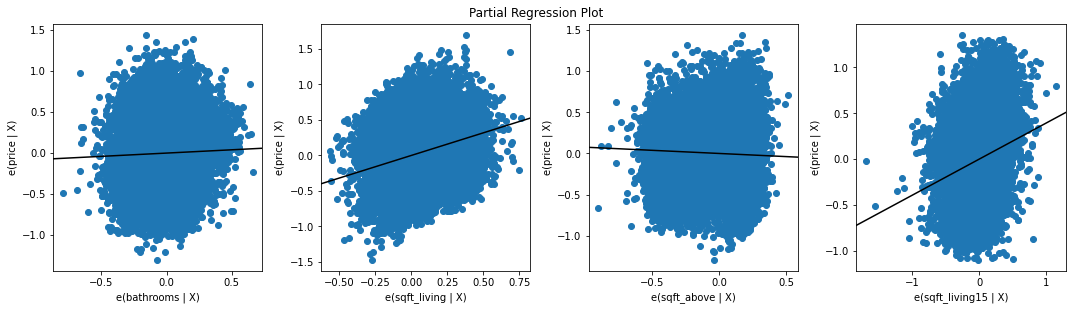

In [154]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(third_results,
                                  exog_idx=list(X_all.columns.values),
                                  grid=(2,4),
                                  fig=fig)
plt.show()

**Model Evaluation**

In [155]:
mae = third_results.resid.abs().sum() / len(y)
mae

0.3067996070529391

model is off by 0.29K dollars in a given prediction

model value is smaller and near zero making it the best model

# Modeling with categorical variables

**Model with multiple  variables and waterfront being categorical variable**

In [156]:
# Model with multiple independent  variables and waterfront being categorical
df['waterfront'].value_counts(ascending=True)

YES      143
NO     21424
Name: waterfront, dtype: int64

In [157]:
# choosing my refence category based on the model to avoid dummy variable trap
X_waterfront_model = df[['sqft_living','bathrooms','sqft_above','sqft_living15','waterfront']]
# origin is categorical and needs to be numeric to run regression
X_waterfront_model = pd.get_dummies(X_waterfront_model, columns=['waterfront'], drop_first=True, dtype=int)

waterfront_model = sm.OLS(y, sm.add_constant(X_waterfront_model))
waterfront_results = waterfront_model.fit()

print(waterfront_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     4123.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:34:51   Log-Likelihood:                -9383.2
No. Observations:               21567   AIC:                         1.878e+04
Df Residuals:                   21561   BIC:                         1.883e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.8660      0.070     84.

**Interpretation**

sqft_living: For each additional square foot of living space, the estimated house price increases by 0.6225 thousand dollars.

bathrooms: For each additional bathroom, the estimated house price increases by 0.0845 thousand dollars.

sqft_above: For each additional square foot above ground, the estimated house price decreases by 0.0700 thousand dollars.

sqft_living15: For each additional square foot of the 2015 living space, the estimated house price increases by 0.3846 thousand dollars.

waterfront_YES: If a house has a waterfront (compared to not having a waterfront), the estimated house price increases by 0.7234 thousand dollars.

Overall Model:

The overall model has an R-squared value of 0.489, indicating that approximately 48.9% of the variability in house prices is explained by the model.
Statistical Significance:

All coefficients have p-values less than 0.05, indicating that they are statistically significant.

**Visualization**

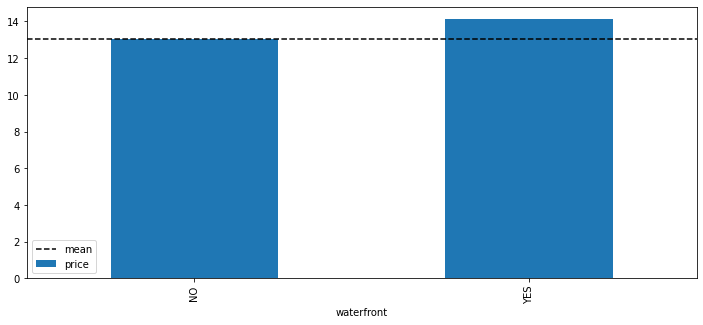

In [158]:
fig, ax = plt.subplots(figsize=(12,5))
df.groupby("waterfront").mean('price').sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=df["price"].mean(), label="mean", color="black", linestyle="--")
ax.legend();

Visualization using Partial regression plot

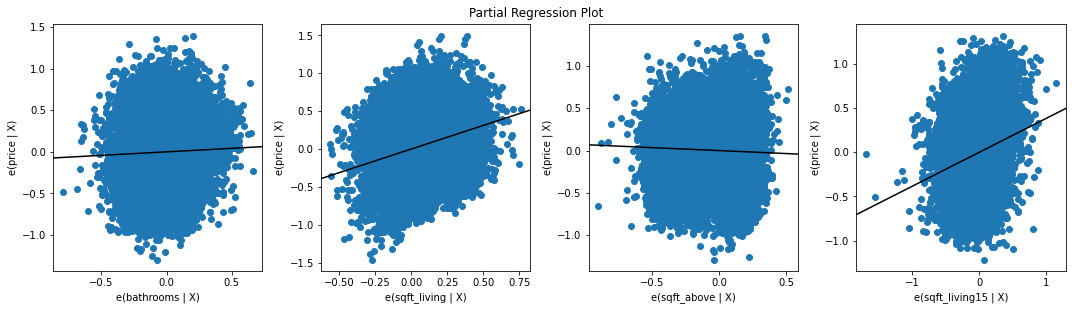

In [159]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(waterfront_results,
                                  exog_idx=list(X_all.columns.values),
                                  grid=(2,4),
                                  fig=fig)
plt.show()

**Model Evaluation using mean absolute error

In [160]:
mae = waterfront_results.resid.abs().sum() / len(y)
mae

0.30394942648619927

model is off by 0.30K dollars in a given prediction

**Model with multiple independent variables and view being: categorical variable**

In [161]:
# Choosing my reference category based on the one which is most common
df['view'].value_counts(ascending=True)


EXCELLENT      310
FAIR           329
GOOD           505
AVERAGE        953
NONE         19470
Name: view, dtype: int64

In [162]:

X_view_model = df[['sqft_living', 'bathrooms', 'sqft_above', 'sqft_living15', 'view']]

X_view_model = pd.get_dummies(X_view_model, columns=['view'], dtype=int)
#Drop one of the dummy variable columns ('view_NONE')

X_view_model = X_view_model.drop("view_NONE", axis=1)

X_view_model = sm.add_constant(X_view_model)

y = df['price']

View_model = sm.OLS(y, X_view_model)

View_results = View_model.fit()

print(View_results.summary())




                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     2762.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:34:53   Log-Likelihood:                -9010.2
No. Observations:               21567   AIC:                         1.804e+04
Df Residuals:                   21558   BIC:                         1.811e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.3165      0.070     89.

**Interpretation**

sqft_living: For each additional square foot of living space, the estimated house price increases by 0.5606 thousand dollars.

bathrooms: For each additional bathroom, the estimated house price increases by 0.0949 thousand dollars.

sqft_above: For each additional square foot above ground, the estimated house price decreases by 0.0152 thousand dollars.

sqft_living15: For each additional square foot15, the estimated house price increases by 0.3286 thousand dollars.

Excellent_view: If a house has an Excellent view (compared to not having one, which is represented by the dropped category 'view_None'), the estimated house price increases by 0.5959 thousand dollars.

Average_view:  If a house has an Average view (compared to not having one), the estimated house price increases by 0.2063 thousand dollars.

Fair_view:  If a house has a Fair view (compared to not having one), the estimated house price increases by 0.2479 thousand dollars.

Good_view:  If a house has an Good view (compared to not having one), the estimated house price increases by 0.2797 thousand dollars.

Overall Model:

The overall model has an R-squared value of 0.506, indicating that approximately 50.6% of the variability in house prices is explained by the model. Statistical Significance:

All coefficients have p-values less than 0.05, indicating that they are statistically significant expect for sqft_above

**Visualization**

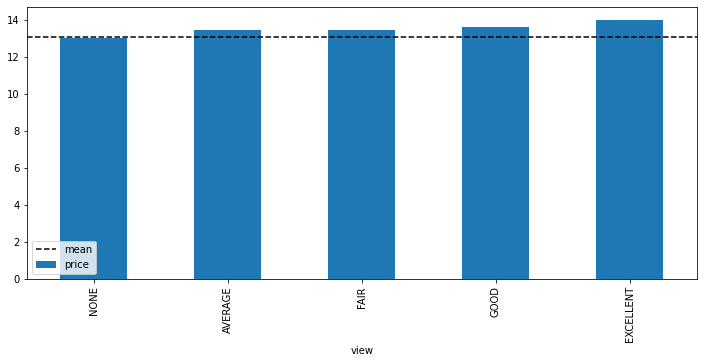

In [163]:
fig, ax = plt.subplots(figsize=(12,5))
df.groupby("view").mean('price').sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=df["price"].mean(), label="mean", color="black", linestyle="--")
ax.legend();

Visualization using Partial regression plot

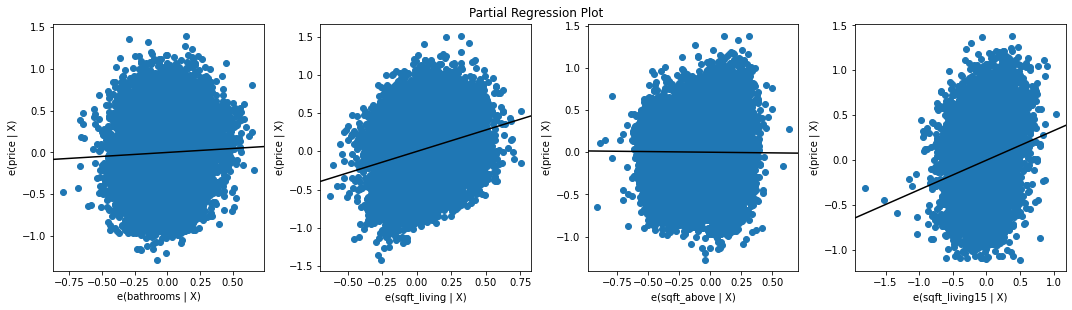

In [164]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(View_results,
                                  exog_idx=list(X_all.columns.values),
                                  grid=(2,4),
                                  fig=fig)
plt.show()

Model Evaluation using mean absolute error

In [165]:
mae = View_results.resid.abs().sum() / len(y)
mae

0.2994914788832302

The model is off by 0.30 thousand dollars in a given prediction